In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('house_price_regression_dataset.csv')
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
train_data = data.loc[:900,:]
X = train_data.drop(["House_Price"],axis=1)
y = train_data["House_Price"]
test_data = data.loc[900:,:]
x2 = test_data.drop(["House_Price"],axis=1)
y2 = test_data["House_Price"]

# From Scratch

In [6]:
class LinearRegressions:
    def __init__(self, alpha=0.001, num_iter=5000):
        self.alpha = alpha
        self.num_iter = num_iter
        self.theta = None
        self.theta0 = 0
        
    def predict(self, X):
        return np.dot(X, self.theta) + self.theta0
    
    def cost(self, X, y):
        m = X.shape[0]
        predictions = self.predict(X)
        J_0 = np.sum((predictions - y) ** 2) / (2 * m)
        return J_0
    
    def gradient(self, X, y):
        m = X.shape[0]
        predictions = self.predict(X)
        error = predictions - y
        
        dj_d0 = np.sum(error) / m
        dj_dtheta = np.dot(X.T, error) / m
        
        return dj_d0, dj_dtheta
    
    def gradient_descent(self, X, y):
        cost_history = []
        
        for _ in range(self.num_iter):
            dj_d0, dj_dtheta = self.gradient(X, y)
            
            self.theta0 -= self.alpha * dj_d0
            self.theta -= self.alpha * dj_dtheta
            
            cost = self.cost(X, y)
            cost_history.append(cost)
        
        return self.theta, self.theta0, cost_history

In [7]:
m = 100  
n = 3    
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

model = LinearRegressions(alpha=0.01, num_iter=1500)
model.theta = np.zeros(X_scaled.shape[1])
theta, theta0, cost_history = model.gradient_descent(X_scaled, y)

print("Optimized theta:", model.theta)
print("Optimized theta0:", model.theta0)
print("Final cost:", cost_history[-1])

Optimized theta: [250008.88545399  14595.19335921   6712.02789505  20279.56239315
  19221.13536466   4157.84631234    358.48154013]
Optimized theta0: 615883.8566282354
Final cost: 48056057.54646708


# Using Sklearn

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled,y)
print(model.score(X_scaled,y))

0.99849748342585


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
predictions = model.predict(X_scaled)

# Calculate metrics
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R²): 0.99849748342585
Mean Absolute Error (MAE): 7771.395798023379
Mean Squared Error (MSE): 96112114.96263263
Root Mean Squared Error (RMSE): 9803.678644398367


# Plots

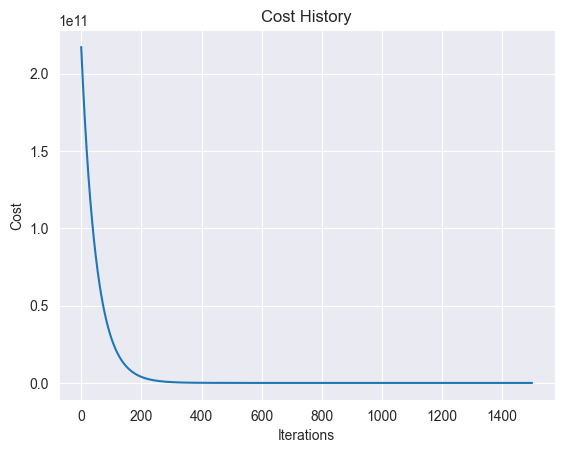

In [10]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

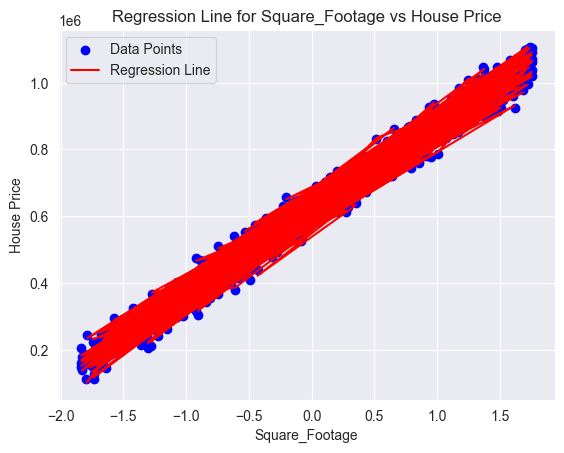

In [11]:
X_single_feature = X_scaled.iloc[:, 0].values.reshape(-1, 1)  

X_plot = X_scaled.copy()  
X_plot.iloc[:, 0] = X_single_feature.reshape(-1) 

predictions = model.predict(X_plot)

plt.scatter(X_single_feature, y, color='blue', label='Data Points')  
plt.plot(X_single_feature, predictions, color='red', label='Regression Line') 
plt.xlabel(X.columns[0])  
plt.ylabel('House Price')
plt.title('Regression Line for ' + X.columns[0] + ' vs House Price')
plt.legend()
plt.show()